
# Create many scenarios, simulate them  and access results 

In this chapter/notebook you will learn how to: 

1. Loading a pre-existing model in Modelflow
2. Creating several experiments based on that model
3. Running your model
4. Visualizing the results 

This Notebook uses the model for Pakistan described here: {cite:author}`Burns2021`

## Imports

Modelflow's modelclass includes most of the methods needed to manage a model in Modelflow.

In [2]:
from modelclass import model 

In [3]:
%load_ext autoreload
%autoreload 2

## Load a pre-existing model, data and descriptions 
The file `pak_exogenized.pcim` contains a dump of model equations, dataframe, simulation options and variable descriptions. 

In [4]:
mpak,baseline = model.modelload('../../models/pak_exogenized.pcim',run=1,silent=1,alfa=0.7,keep='Baseline')

## Create a dictionary with experiments
Now a dictionary of dataframes is created for different values of Carbon emission tax. The *key* is the value of the tax. The *value* is a dataframe where the tax variables are updated. 

Python allows this to be expressed in a quite concise way: 

In [5]:
scenarios = {value: 
    baseline.upd(f"<2020:2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = {value}") 
    for value in [5,10,15,20,25]}


**Python constructs**<br>

| Python construct |explanation|info |
| :- | :---| :---|
|f"... = {value}"|' f-string, {value} is substituted with the value of the variable **value** | [Search](https://www.google.com/search?q=python+dictionary+comprehension&newwindow=1)
|baseline.upd(...)|a new dataframe is created where the three tax variables are updated| [Introduction to dataframe.upd](./model%20update.ipynb)
|{value: model.update(... {value}) for value  in \[5,10 ...]}|Creates a dictionary of dataframes  | [Search dictionary comprehension ](https://www.google.com/search?q=python+dictionary+comprehension&newwindow=1)



## Run the model with all the scenarios

In [6]:
for value,dataframe in scenarios.items(): # Returns the value and the dataframe of each experiment
        _= mpak(dataframe,2020,2100,keep=f'Coal, Oil and Gastax : {value} nominal') # simulates the model 

## Access results 

Let's take a look at the how to extract information stored in our model instance, mpak. 

- **mpak.basedf**: Dataframe with the values for the first scenario
- **mpak.lastdf**: Dataframe with the values for the last scenario 
- **mpak.keep_solutions**: Dictionary with dataframes from *ALL* scenarios 



### mpak.keep_solutions a dictionary with dataframes
As we have multiple scenarios the *keept* solutions will be used in this notebook. <br>
**Modelflow provides a number of ways to visualize the keept results.**  

The dataframe which is keept in the dictionary is the complete solution of the model. So it includes all exogenous and endogenous variables in all years. If the model is large this can become a very large object. Therefor the user can decide only 
to keep some variables - this will not be covered here. 

Below the keys and content of mpak.keep_solutions is shown:

In [7]:
for key,value in mpak.keep_solutions.items(): 
    print(f'key = {key:34}|value = Dataframe with {value.shape[0]} years and {value.shape[1]} variables')

key = Baseline                          |value = Dataframe with 121 years and 1291 variables
key = Coal, Oil and Gastax : 5 nominal  |value = Dataframe with 121 years and 1291 variables
key = Coal, Oil and Gastax : 10 nominal |value = Dataframe with 121 years and 1291 variables
key = Coal, Oil and Gastax : 15 nominal |value = Dataframe with 121 years and 1291 variables
key = Coal, Oil and Gastax : 20 nominal |value = Dataframe with 121 years and 1291 variables
key = Coal, Oil and Gastax : 25 nominal |value = Dataframe with 121 years and 1291 variables


## .keep_plot()  Function to visualize the keept solutions
When creating charts from keep't solutions the goto function is .keep_plot(). As will be shown below it can display the results in a number of ways. 

### .keep_plot(..showtype='level'|'growth'|'change'..) 
keep_plot can display data with three different transformations: 

**Transformation of data displayed:** 

| showtype= |Use this operator|
| :- | :---|
 'level' (default)|No transformation  
 'growth'| The growth rate  in percent 
 'change'| The yearly change ($\Delta$) 

**legend placement**

| legend= |Use this operator|
| :- | :---|
 False (default) |The legends will be placed at the end of the corresponding line
 True|The legends are places in a legend box

The **variables** we want to be displayed is listed as first argument. Variable names can include 
wildcards (using * for any string and ? for any character) 

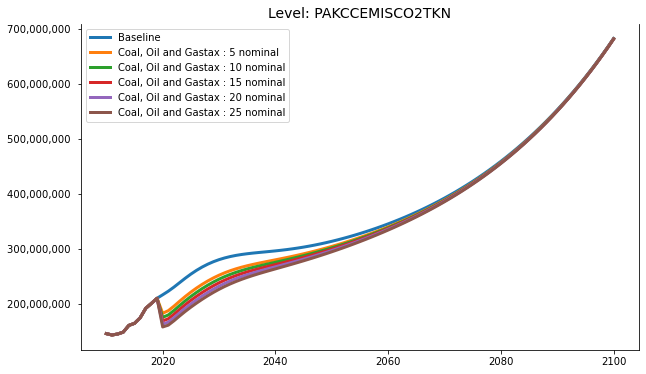

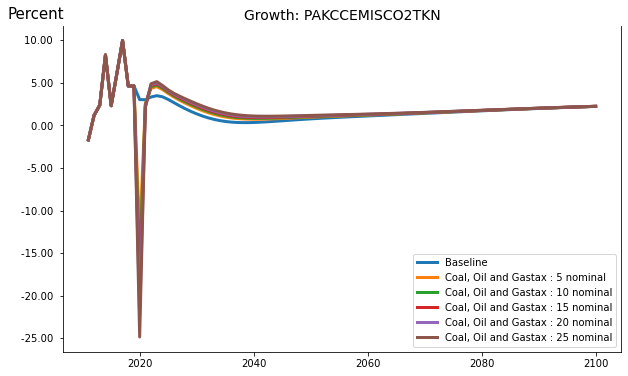

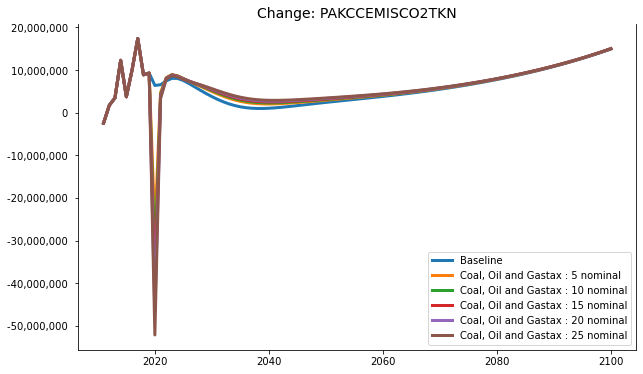

In [8]:
for trans in ['level','growth','change']:
    plot_level  = mpak.keep_plot('PAKCCEMISCO2TKN',2010,2100,showtype=trans,legend=1);

### .keep_plot(,, diff=1|0) show difference to first scenario 
Often it is useful to compare the scenario results with the baseline result. This is done with the diff argument. 

| diff= |Use this operator|
| :- | :---|
 False (default) |All entries in the keep_solution dictionary is displayed
 True|The difference to the first entry is shown.


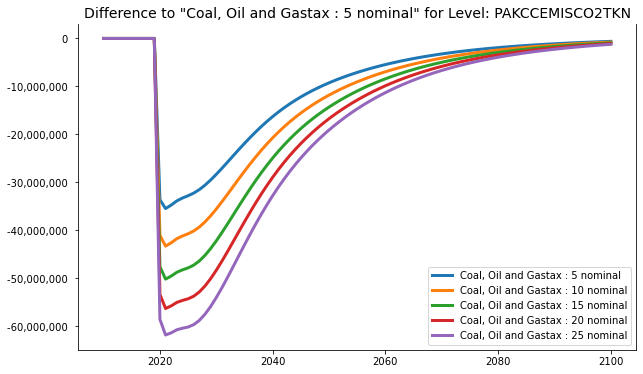

In [9]:
plot_impact = mpak.keep_plot('PAKCCEMISCO2TKN',2010,2100,legend=1,diff=1);

### .keep_plot(,, diffpct=1|0) show difference in percent to first scenario 
Often it is useful to compare the scenario results with the baseline result **measured in percent**. This is done with the diffpct argument. 

| diffpct= |Use this operator|
| :- | :---|
 False (default) |All entries in the keep_solution dictionary is displayed
 True|The difference in percent to the first entry is shown


:::{danger}
diff=1 and diffpct=1 can't be used at the same time
:::

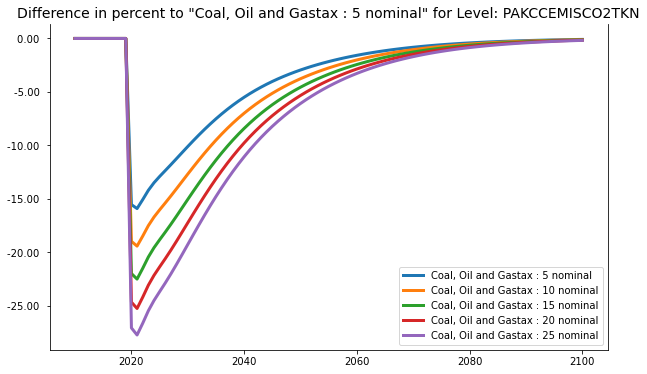

In [10]:
plot_impact = mpak.keep_plot('PAKCCEMISCO2TKN',2010,2100,legend=1,diffpct=1);

### Saving plots in files
keep_plot returns a dictionary of the matplotlib figure objects it has produced. These can be used to create charts in different formats.

In this case the the there is only one 
item in the dictionary. The key is the variable name in the plot:

In [16]:
plot_impact.keys()

dict_keys(['PAKCCEMISCO2TKN'])

We can loop over the items and save the plots in different formats. 

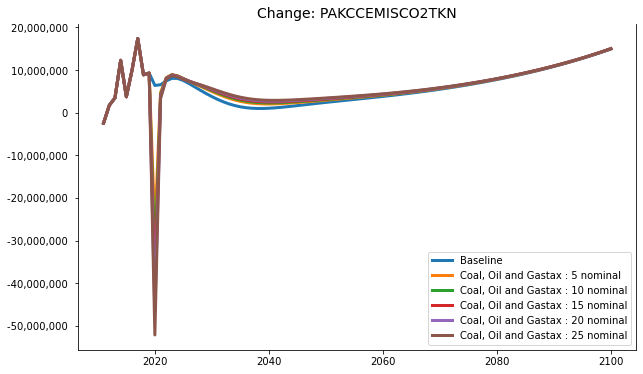

In [12]:
for variable,figure in plot_level.items():
    display(figure)
    figure.savefig(f'graph/{variable}_test.png') # save in png format 
    figure.savefig(f'graph/{variable}_test.pdf') # save in pdf format 
    figure.savefig(f'graph/{variable}_test.svg') # save in svg format

## .keepswitch, Select scenarios for plotting
When creating many scenarios with the ```keep``` keyword it can sometime be useful to: 
- Plot selected scenarios and to change the sequence of the scenarios. 
- To use the .basedf and .lastdf as scenarios. 

To facilitate this the .keepswitch function has been created.

| Parameter |Explanation
| :- | :---|
|switch = True\|False(default) |If True use the .basedf and .lastdf 
|scenario='\<string>'|Listing of scenarios separated by \| if no wildcards else space  
    
.keepswitch is a [context manager](https://www.pythontutorial.net/advanced-python/python-context-managers) like .set_smpl.
So it works in the scope of a ```with```. After the with statement the keept solutions are restored.

In [27]:
print('Before with mpak.keepswitch:',*mpak.keep_solutions.keys(),sep='\n')
with mpak.keepswitch(scenarios = '*25* *15*'):
   print('\nDuring with mpak.keepswitch:',*mpak.keep_solutions.keys(),sep='\n')
print('\nAfter with mpak.keepswitch:',*mpak.keep_solutions.keys(),sep='\n')


Before with mpak.keepswitch:
Baseline
Coal, Oil and Gastax : 5 nominal
Coal, Oil and Gastax : 10 nominal
Coal, Oil and Gastax : 15 nominal
Coal, Oil and Gastax : 20 nominal
Coal, Oil and Gastax : 25 nominal

During with mpak.keepswitch:
Coal, Oil and Gastax : 25 nominal
Coal, Oil and Gastax : 15 nominal

After with mpak.keepswitch:
Baseline
Coal, Oil and Gastax : 5 nominal
Coal, Oil and Gastax : 10 nominal
Coal, Oil and Gastax : 15 nominal
Coal, Oil and Gastax : 20 nominal
Coal, Oil and Gastax : 25 nominal


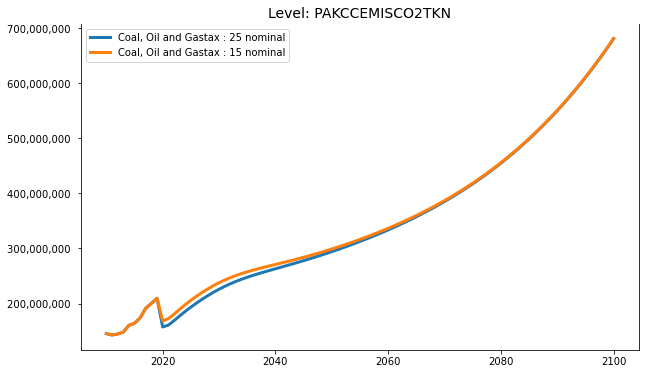

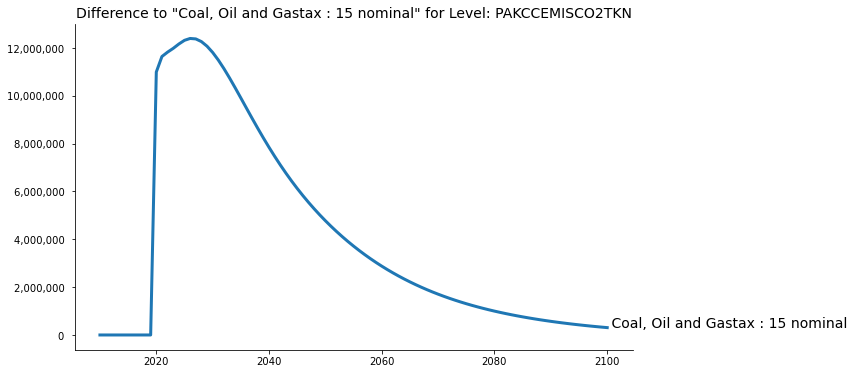

In [17]:
with mpak.keepswitch(scenarios = '*25* *15*'):
   mpak.keep_plot('PAKCCEMISCO2TKN',2010,2100,legend=1)
   mpak.keep_plot('PAKCCEMISCO2TKN',2010,2100,diff=1,legend=0)

## .modeldump() Saving results

The 'keep' option ensures, that the solutions are saved together with the model, data and descriptions. 

Note: When working with large data and many scenarios, this file takes up a lot of space! 

In [15]:
mpak.modeldump('../models/pak scenarios.pcim',keep=1)